### Análise de Dados - Portal da Transparência

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.2f}'.format) #Formata os dados numéricos com 2 casas decimais
pd.set_option('display.max_columns', None) #Mostrar todas as colunas

ano = 2024
caminho_saida_tabela = f'Datasets/output/Tabela_{ano}.xlsx'
caminho_saida_grafico = f'Datasets/output/Grafico_{ano}.png'

df_viagens = pd.read_csv(f'Datasets/{ano}_Viagem.csv', encoding='windows-1252', sep=';', decimal=',')

In [39]:
#Criando nova coluna de Despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

In [40]:
#Ajustando valores Nulos na coluna de Cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Não identificado')

In [41]:
#Covertendo colunas de Datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

In [42]:
#Criando novas colunas de Datas

df_viagens['Mês da viagem'] = df_viagens['Período - Data de fim'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

In [44]:
#Agrupando por Cargo e calculando várias métricas
df_viagens_consolidado = df_viagens.groupby('Cargo').agg(
    Despesa_média=('Despesas', 'mean'),
    Duração_média=('Dias de viagem', 'mean'),
    Despeas_totais=('Despesas', 'sum'),
    Destinos_mais_frequente=('Destinos', pd.Series.mode),
    Num_viagens=('Nome', 'count')
).reset_index()

#Filtrando tabela por cargos relevantes (> 1% das viagens)
df_cargos = (df_viagens['Cargo'].value_counts(normalize=True)*100).rename('Proporção').reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['Proporção'] > 1, 'Cargo']

filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)
df_final = df_viagens_consolidado[filtro]
df_final = df_final.sort_values(by='Num_viagens', ascending=False)

#Salvando a tabela final
df_final.to_excel(caminho_saida_tabela, index=False) #Salva no formato do Excel

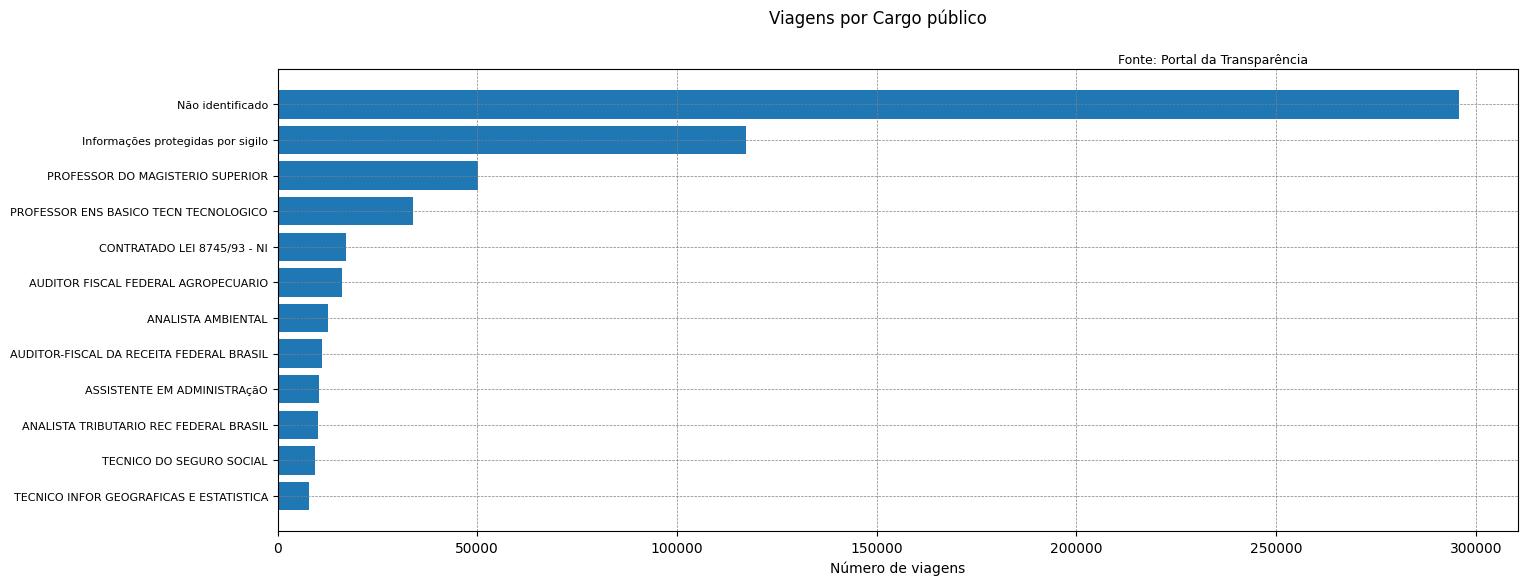

In [45]:
#Plotando gráfico

fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(df_final['Cargo'], df_final['Num_viagens'])
ax.invert_yaxis()

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize=9)

fig.suptitle('Viagens por Cargo público')
plt.xlabel('Número de viagens')

#Salvando o gráfico
plt.savefig(caminho_saida_grafico, bbox_inches='tight')